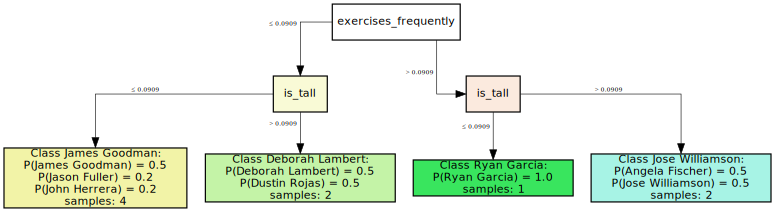

In [ ]:
from faker import Faker
import random
from river import tree

fake = Faker()

num_samples = 10
dataset = []
used_names = set()

model = tree.HoeffdingAdaptiveTreeClassifier(
    grace_period=0,  # grace_periodを0に
    split_criterion='info_gain',  # split_criterionはinfo_gain推奨
    delta=1e-10,  # deltaを限りなく小さく
    min_branch_fraction=0.0,
    max_depth=100  # 念のため最大深度を設定
)

for _ in range(num_samples):
    features = {
        "is_tall": random.choice([True, False]),
        "is_heavy": random.choice([True, False]),
        "exercises_frequently": random.choice([True, False]),
    }
    # ユニークな名前を生成
    while True:
        name = fake.name()
        if name not in used_names:
            used_names.add(name)
            break

    # river incremental learning
    model.learn_one(features, name)

# 木の構造を表示
model.draw()

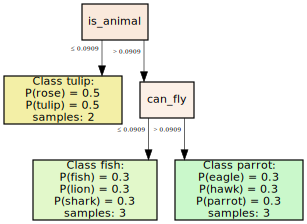

In [151]:
from river import tree
from river import metrics
import random  # データをシャッフルするためにrandomモジュールをインポート

# 特徴量の定義
features = ["is_animal", "is_land", "is_carnivore"]

# データセットの作成（リスト形式）
dataset = [
    ({"is_animal": False, "is_carnivore": False, "can_fly": False}, "rose"),
    ({"is_animal": True, "is_carnivore": True, "can_fly": False}, "lion"),
    ({"is_animal": True, "is_carnivore": True, "can_fly": True}, "hawk"),
    ({"is_animal": True, "is_carnivore": False, "can_fly": False}, "cow"),
    ({"is_animal": True, "is_carnivore": True, "can_fly": False}, "shark"),
    ({"is_animal": True, "is_carnivore": False, "can_fly": False}, "fish"),
    ({"is_animal": True, "is_carnivore": False, "can_fly": False}, "sheep"),
    ({"is_animal": True, "is_carnivore": True, "can_fly": True}, "eagle"),
    ({"is_animal": True, "is_carnivore": False, "can_fly": True}, "parrot"),
    ({"is_animal": True, "is_carnivore": False, "can_fly": False}, "salmon"),
    ({"is_animal": False, "is_carnivore": False, "can_fly": False}, "tulip"),
]

# モデルの定義 (grace_periodを0に設定)
model = tree.HoeffdingTreeClassifier(
    grace_period=0,
    split_criterion='info_gain',
    max_depth=len(dataset[0][0].keys()),
)

# メトリックの定義
metric = metrics.Accuracy()

# データの順序をシャッフル
random.shuffle(dataset)

# 学習と評価
for x, animal_name in dataset:
    model.learn_one(x, animal_name)

# 木の構造の表示
model.draw()

In [152]:
from river import evaluate
from river import metrics

metric = metrics.Accuracy()
evaluate.progressive_val_score(dataset, model, metric)

Accuracy: 9.09%

In [ ]:
print(model.summary)  # model.summaryは辞書なので、printで表示させる

{'n_nodes': 3, 'n_branches': 1, 'n_leaves': 2, 'n_active_leaves': 2, 'n_inactive_leaves': 0, 'height': 2, 'total_observed_weight': 6.0}


{0: 6.394267984578837, 1: 0.25010755222666936, 2: 2.7502931836911926} False
{0: 2.2321073814882277, 1: 7.364712141640124, 2: 6.766994874229113} True
{0: 8.921795677048454, 1: 0.8693883262941615, 2: 4.2192181968527045} True
{0: 0.29797219438070344, 1: 2.1863797480360336, 2: 5.053552881033624} False
{0: 0.26535969683863625, 1: 1.988376506866485, 2: 6.498844377795232} False
{0: 5.449414806032166, 1: 2.204406220406967, 2: 5.892656838759088} False
{0: 8.094304566778266, 1: 0.06498759678061017, 2: 8.05819251832808} True
{0: 6.981393949882269, 1: 3.4025051651799187, 2: 1.5547949981178155} True
{0: 9.572130722067811, 1: 3.365945451126268, 2: 0.9274584338014791} True
{0: 0.9671637683346401, 1: 8.474943663474598, 2: 6.037260313668911} True


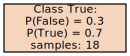

In [148]:
from river.datasets import synth
from river import evaluate
from river import metrics
from river import tree

gen = synth.ConceptDriftStream(stream=synth.SEA(seed=42, variant=0),
                               drift_stream=synth.SEA(seed=42, variant=1),
                               seed=1, position=500, width=50)
dataset = iter(gen.take(10))

model = tree.HoeffdingAdaptiveTreeClassifier(
    grace_period=100,
    delta=1e-5,
    leaf_prediction='nb',
    nb_threshold=10,
    seed=0
)

for x, y in dataset:
    print(x, y)
    model.learn_one(x, y)

# metric = metrics.Accuracy()

# evaluate.progressive_val_score(dataset, model, metric)
model.draw()